In [3]:
!pip install osmnx
import osmnx as ox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


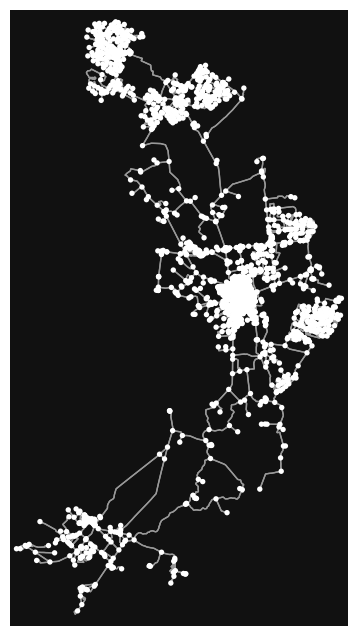

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [33]:
G = ox.graph_from_place('Guararapes, Brazil')
ox.plot_graph(G)

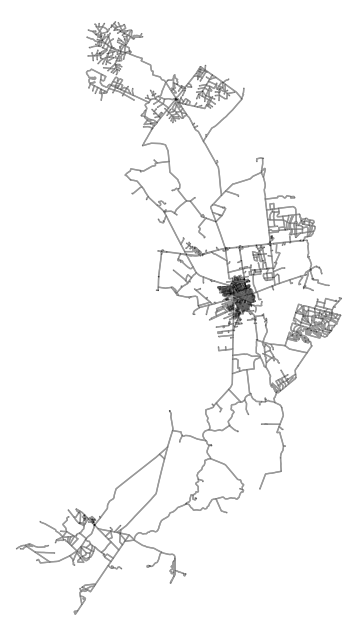

In [34]:
fig, ax = ox.plot_graph(
    G,
    ax=None,  # optionally draw on pre-existing axis
    figsize=(8, 8),  # figure size to create if ax is None
    bgcolor="white",  # background color of the plot
    node_color="black",  # color of the nodes
    node_size=1,  # size of the nodes: if 0, skip plotting them
    node_alpha=0.3,  # opacity of the nodes
    node_edgecolor="none",  # color of the nodes' markers' borders
    node_zorder=1,  # zorder to plot nodes: edges are always 1
    edge_color="#999999",  # color of the edges
    edge_linewidth=1,  # width of the edges: if 0, skip plotting them
    edge_alpha=None,  # opacity of the edges
    show=True,  # if True, call pyplot.show() to show the figure
    close=False,  # if True, call pyplot.close() to close the figure
    save=False,  # if True, save figure to disk at filepath
    filepath=None,  # if save is True, the path to the file
    dpi=300,  # if save is True, the resolution of saved file
    bbox=None,  # bounding box to constrain plot
)

In [89]:
import networkx as nx
import numpy as np
#from itertools import permutations
from itertools import product
from tqdm import tqdm
import random

def random_paths(G, s, t, n):
    all_paths = list(nx.all_simple_paths(G, source=s, target=t))
    if len(all_paths) < n:
        random_paths = all_paths
    else:
      random_paths = random.sample(all_paths, n)
    return random_paths

def generate_all_permutations_with_repetition(G, n = 15):
    nodes = list(G.nodes)
    all_permutations = list(product(nodes, repeat=2))

    if len(all_permutations) < n:
        random_permutations = all_permutations
    else:
      random_permutations = random.sample(all_permutations, n)
    return random_permutations


def calculate_total_information(G, s, t):
    all_paths = random_paths(G, s, t, n = 2)
    print(all_paths)
    results = []
    if len(all_paths) > 0:
      for path in all_paths:
          # Exclude s and t nodes from the path
          path_without_s_t = path[1:-1]
          if len(path_without_s_t) == 0:
              degree_product_without_s = 1.0
          else:
              # Calculate the sum of degrees - 1 for each node in the path
              degree_product_without_s = np.prod([1/(G.degree(node) - 1) for node in path_without_s_t])
              # Multiply the result by the inverse of the degree of s
          probability = (1 / G.degree(s)) * degree_product_without_s
          results.append(probability)
    else:
        probability = 1.0
        results.append(probability)
    total_information = -np.log2(sum(results))
    return total_information

def calculate_avg_information(G):
    nodes = list(G.nodes)
    results = []
    # Creating all permutations through two nodes
    all_permutations = generate_all_permutations_with_repetition(G)
    for permutation in tqdm(all_permutations):
        s, t = permutation
        total_information = calculate_total_information(G, s, t)
        results.append(total_information)
    #N = len(G.nodes())
    N = np.sqrt(len(results)) #Adaptando para o metodo estocastico
    avg_information = sum(results) / N**2
    scaled_avg_information = avg_information / np.log2(N)
    return avg_information, scaled_avg_information

In [1]:
##### TO TENTANDO POR ESSE
import networkx as nx
import numpy as np
#from itertools import permutations
from itertools import product
from tqdm import tqdm
import random
import pandas as pd

import networkx as nx
import random

def random_path(G, s, t):
    visited = {s}
    stack = [(s, [s])]
    while stack:
        (node, path) = stack.pop()
        for next_node in sorted(list(G.neighbors(node)), key=lambda x: random.random()):
            if next_node in visited:
                continue
            elif next_node == t:
                yield path + [next_node]
            else:
                visited.add(next_node)
                stack.append((next_node, path + [next_node]))


def generate_all_permutations_with_repetition(G, max_number_of_pairs):
    nodes = list(G.nodes)
    all_permutations = list(product(nodes, repeat=2))
    if len(all_permutations) < max_number_of_pairs:
        random_permutations = all_permutations
    else:
      random_permutations = random.sample(all_permutations, max_number_of_pairs)
    return random_permutations


def calculate_total_information(G, s, t, max_paths_per_pairs):
    all_paths = list()
    path_generator = random_path(G, s, t)
    # generate n paths
    for _ in range(max_paths_per_pairs):
        try:
            all_paths.append(next(path_generator))
        except StopIteration:
            break
    #print(all_paths)
    results = []
    if len(all_paths) > 0:
      for path in all_paths:
          # Exclude s and t nodes from the path
          path_without_s_t = path[1:-1]
          if len(path_without_s_t) == 0:
              degree_product_without_s = 1.0
          else:
              # Calculate the sum of degrees - 1 for each node in the path
              degree_product_without_s = np.prod([1/(G.degree(node) - 1) for node in path_without_s_t])
              # Multiply the result by the inverse of the degree of s
          probability = (1 / G.degree(s)) * degree_product_without_s
          results.append(probability)
    else:
        probability = 1.0
        results.append(probability)
    sum_probabilities_ = sum(results)
    if sum_probabilities_ == 0:
      sum_probabilities = 1
    else:
      sum_probabilities = sum_probabilities_
    total_information = -np.log2(sum_probabilities)
    return total_information

def calculate_avg_information(G, max_number_of_pairs = 10, max_paths_per_pairs = 1):
    nodes = list(G.nodes)
    results = []
    # Creating all permutations through two nodes
    all_permutations = generate_all_permutations_with_repetition(G, max_number_of_pairs)
    for permutation in tqdm(all_permutations):
        s, t = permutation
        total_information = calculate_total_information(G, s, t, max_paths_per_pairs)
        results.append(total_information)
    #N = len(G.nodes())
    N = np.sqrt(len(results)) #Adaptando para o metodo estocastico
    avg_information = sum(results) / N**2
    scaled_avg_information = avg_information / np.log2(N)
    return avg_information, scaled_avg_information

100%|██████████| 10/10 [00:00<00:00, 2915.34it/s]

[[2, 3]]
[[1, 3, 4, 6]]
[[7, 4]]
[[1, 2]]
[[2, 3, 4, 7]]
[[5, 7]]
[[7, 4, 3]]
[[2, 3, 4, 6]]
[[3, 4, 6]]
[]


(2.109473750504809, 1.2700297479354894)

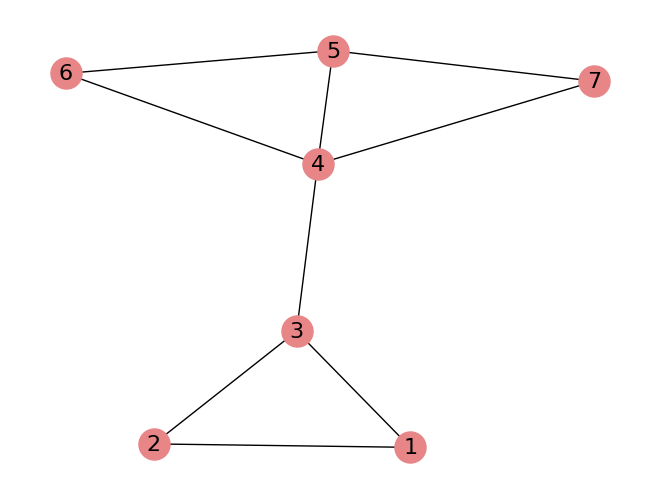

In [16]:
# Create a sample graph for testing

G = nx.Graph()
edges = [(1, 2), (2, 3), (1, 3), (3, 4), (4, 5), (5, 6), (4, 6), (4,7), (7,5)]
G.add_edges_from(edges)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos, node_color='#E78587')
calculate_avg_information(G)

In [ ]:
G_guararapes = ox.graph_from_place('Guararapes, Brazil')
results = pd.DataFrame(columns = [["max_number_of_pairs", "max_paths_per_pairs", "avg_information", "scaled_avg_information"]])
index = 0
for i in [10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]:
  for j in [10, 20, 50, 100, 500, 1000]:
    avg_information_guararapes, scaled_avg_information_guararapes = calculate_avg_information(G_guararapes, max_number_of_pairs = i, max_paths_per_pairs = j)
    results.loc[index] = [i, j, avg_information_guararapes, scaled_avg_information_guararapes]
    index += 1

 83%|████████▎ | 41340/50000 [08:24<01:33, 92.31it/s]

In [75]:
df = results.copy()
df['max_paths_per_pairs'] = df.max_paths_per_pairs.astype(str)

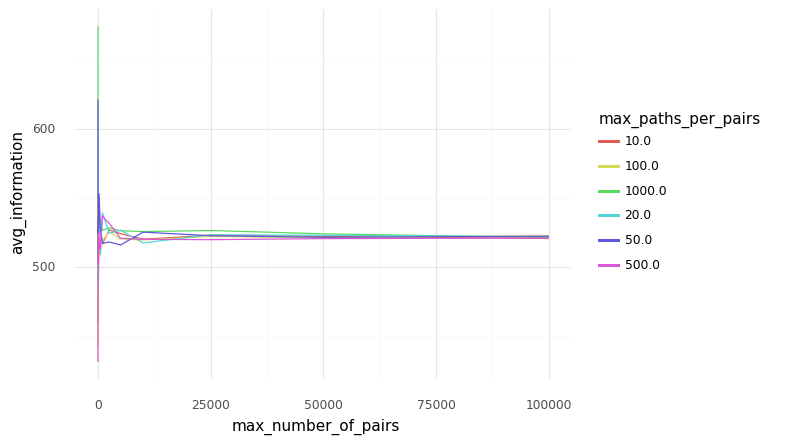

<ggplot: (8738360197406)>

In [76]:
import plotnine as p9

# Create the line plot
plot = (p9.ggplot(df)
        + p9.aes(x='max_number_of_pairs', y='avg_information', color = 'max_paths_per_pairs')
        + p9.geom_line()
        + p9.theme_minimal()
)
plot

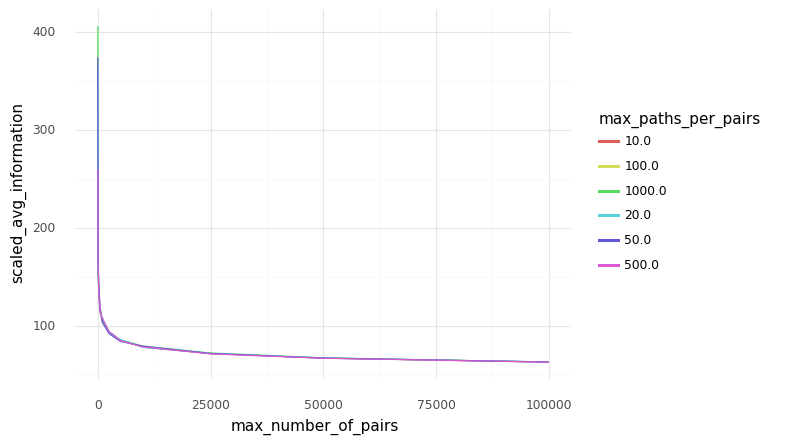

<ggplot: (8738360212664)>

In [77]:
import plotnine as p9

# Create the line plot
plot = (p9.ggplot(df)
        + p9.aes(x='max_number_of_pairs', y='scaled_avg_information', color = 'max_paths_per_pairs')
        + p9.geom_line()
        + p9.theme_minimal()
)
plot

In [78]:
df.tail(20)

,max_number_of_pairs,max_paths_per_pairs,avg_information,scaled_avg_information
52,10000.0,500.0,519.930967,78.257408
53,10000.0,1000.0,525.546385,79.102613
54,25000.0,10.0,522.873316,71.579217
55,25000.0,20.0,523.217631,71.626353
56,25000.0,50.0,522.519332,71.530758
57,25000.0,100.0,521.986482,71.457814
58,25000.0,500.0,519.655574,71.138722
59,25000.0,1000.0,526.299940,72.048308
60,50000.0,10.0,522.073037,66.891103
61,50000.0,20.0,522.839012,66.989245


In [ ]:

results = pd.DataFrame(columns = [["max_number_of_pairs", "max_paths_per_pairs", "avg_information", "scaled_avg_information"]])
index = 0
for i in [10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]:
  for j in [10, 20, 50, 100, 500, 1000]:
    avg_information_guararapes, scaled_avg_information_guararapes = calculate_avg_information(G_guararapes, max_number_of_pairs = i, max_paths_per_pairs = j)
    results.loc[index] = [i, j, avg_information_guararapes, scaled_avg_information_guararapes]
    index += 1

In [3]:
G_sp = ox.graph_from_place('São Paulo, Brazil')

In [ ]:
results = pd.DataFrame(columns = [["max_number_of_pairs", "max_paths_per_pairs", "avg_information", "scaled_avg_information"]])
index = 0
for i in [10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]:
  for j in [50, 100, 500, 1000]:
    avg_information_sp, scaled_avg_information_sp = calculate_avg_information(G_sp, max_number_of_pairs = i, max_paths_per_pairs = j)
    results.loc[index] = [i, j, avg_information_sp, scaled_avg_information_sp]
    index += 1

In [85]:
import networkx as nx
import numpy as np
#from itertools import permutations
from itertools import product

def generate_all_permutations_with_repetition(G):
    nodes = list(G.nodes)
    all_permutations = list(product(nodes, repeat=2))
    return all_permutations

def calculate_total_information(G, s, t):
    all_paths = list(nx.all_simple_paths(G, source=s, target=t))
    print("all_paths", all_paths)
    results = []
    if len(all_paths) > 0:
      for path in all_paths:
          # Exclude s and t nodes from the path
          path_without_s_t = path[1:-1]
          print("path_without_s_t", path_without_s_t)
          if len(path_without_s_t) == 0:
              degree_product_without_s = 1.0
          else:
              # Calculate the sum of degrees - 1 for each node in the path
              degree_product_without_s = np.prod([1/(G.degree(node) - 1) for node in path_without_s_t])
              print("degree_product_without_s", degree_product_without_s)
              # Multiply the result by the inverse of the degree of s
          print("G.degree(s): ", G.degree(s))
          probability = (1 / G.degree(s)) * degree_product_without_s
          print("probability: ", probability)
          results.append(probability)
    else:
        probability = 1.0
        print("probability: ", probability)
        results.append(probability)
    total_information = -np.log2(sum(results))
    return total_information

def calculate_avg_information(G):
    nodes = list(G.nodes)
    results = []
    # Creating all permutations through two nodes
    all_permutations = generate_all_permutations_with_repetition(G)
    for permutation in all_permutations:
        s, t = permutation
        print("------------")
        print("s,t:", (s, t))
        total_information = calculate_total_information(G, s, t)
        print("total information: ", total_information)
        results.append(total_information)
    N = len(G.nodes())
    print("N, N**2: ", (N, N**2))
    print("all total information: ", results)
    print("len all total information", len(results))
    avg_information = sum(results) / N**2
    print("total avg_information: ", avg_information)
    return avg_information

In [98]:
import networkx as nx
import random

def random_path(G, s, t):
    visited = {s}
    stack = [(s, [s])]
    while stack:
        (node, path) = stack.pop()
        for next_node in sorted(list(G.neighbors(node)), key=lambda x: random.random()):
            if next_node in visited:
                continue
            elif next_node == t:
                yield path + [next_node]
            else:
                visited.add(next_node)
                stack.append((next_node, path + [next_node]))

# Create a sample graph for testing
G = nx.Graph()
edges = [(1, 2), (2, 3), (1, 3), (3, 4), (4, 5), (5, 6), (4, 6)]
G.add_edges_from(edges)

# Start node
s = 1
# Target node
t = 6

paths = list()
n = 2 # Number of paths
path_generator = random_path(G, s, t)

# generate n paths
for _ in range(n):
    try:
        paths.append(next(path_generator))
    except StopIteration:
        break
print(paths)


[[1, 3, 4, 6], [1, 3, 4, 5, 6]]


In [99]:
path_generator

<generator object random_path at 0x7f1cd38edd20>